## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_totaldata = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')
mouse_totaldata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar plots

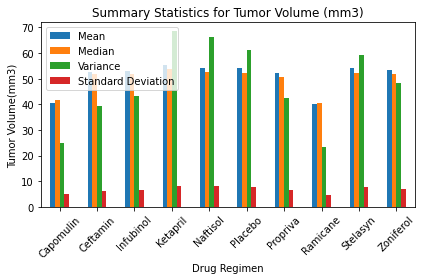

In [76]:
#Make new DataFrame with summary statistics
mouse_totaldata_drugs = mouse_totaldata.groupby(['Drug Regimen'])

mean_tumor_volume = mouse_totaldata_drugs['Tumor Volume (mm3)'].mean()
median_tumor_volume = mouse_totaldata_drugs['Tumor Volume (mm3)'].median()
variance_tumor_volume = mouse_totaldata_drugs['Tumor Volume (mm3)'].var()
std_tumor_volume = mouse_totaldata_drugs['Tumor Volume (mm3)'].std()

tumor_volume_regimen = pd.DataFrame({'Mean':mean_tumor_volume,'Median':median_tumor_volume,
                                     'Variance':variance_tumor_volume,'Standard Deviation':std_tumor_volume})
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_volume_regimen.plot(kind='bar',title='Summary Statistics for Tumor Volume (mm3)',rot=45)
plt.ylabel('Tumor Volume(mm3)')
plt.tight_layout()

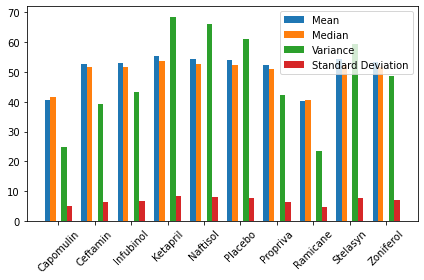

In [77]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = mean_tumor_volume.index
barwidth = 0.15

mean_position = [x-barwidth*2 for x in range(len(x_axis))]
median_position = [x-barwidth for x in range(len(x_axis))]
variance_position = [x+barwidth for x in range(len(x_axis))]
standard_deviation_position = [x+barwidth*2 for x in range(len(x_axis))]

plt.bar(mean_position,mean_tumor_volume,label='Mean',width=barwidth)
plt.bar(median_position,median_tumor_volume,label='Median',width=barwidth)
plt.bar(variance_position,variance_tumor_volume,label='Variance',width=barwidth)
plt.bar(standard_deviation_position,std_tumor_volume,label='Standard Deviation',width=barwidth)
plt.legend()
plt.xticks(np.arange(len(x_axis)),x_axis,rotation=45)
plt.tight_layout()
plt.show()

## Pie plots

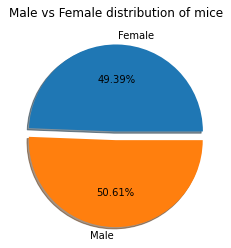

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_totaldata_sex = mouse_totaldata.groupby(['Sex'])
mouse_totaldata_sex_count = mouse_totaldata_sex['Sex'].count()
mouse_totaldata_sex_count.name = ''
explode = [0,0.1]
mouse_totaldata_sex_count.plot(kind='pie',title='Male vs Female distribution of mice',
                               autopct='{:.2f}%'.format,explode=explode,shadow=True)


Text(0.5, 1.0, 'Male vs Female Distribution of mice')

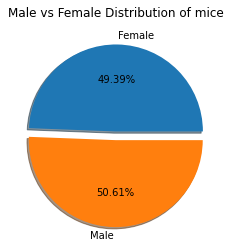

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
explode = [0,0.1]
plt.pie(mouse_totaldata_sex_count,labels=labels,autopct='{:.2f}%'.format,shadow=True,explode=explode)
plt.title('Male vs Female Distribution of mice')

## Quartiles, outliers and boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

def Outlier_Data(TumorVolumes):
    
    TumorVolumes_quartiles = TumorVolumes.quantile([.25,.5,.75])
    TumorVolumes_lowerq = TumorVolumes_quartiles[0.25]
    TumorVolumes_upperq = TumorVolumes_quartiles[0.75]
    TumorVolumes_iqr = TumorVolumes_upperq - TumorVolumes_lowerq
    TumorVolumes_lower_bound = TumorVolumes_lowerq - (1.5*TumorVolumes_iqr)
    TumorVolumes_upper_bound = TumorVolumes_upperq + (1.5*TumorVolumes_iqr)
    
    return [TumorVolumes_lowerq,TumorVolumes_upperq,TumorVolumes_iqr,TumorVolumes_lower_bound,TumorVolumes_upper_bound]
    
capomulin_timepoint45_data = mouse_totaldata.loc[(mouse_totaldata['Drug Regimen'] == 'Capomulin') & (mouse_totaldata['Timepoint'] == 45),:]
capomulin_final_tumorVolumes = capomulin_timepoint45_data['Tumor Volume (mm3)']
capomulin_outlier_data = Outlier_Data(capomulin_final_tumorVolumes)

capomulin_outliers = []
for value in capomulin_final_tumorVolumes:
    if value < capomulin_outlier_data[3] or value > capomulin_outlier_data[4]:
        capomulin_outliers.append(value)
        
print(f'Capomulin Potential Outliers: {capomulin_outliers}')

ramicane_timepoint45_data = mouse_totaldata.loc[(mouse_totaldata['Drug Regimen'] == 'Ramicane') & (mouse_totaldata['Timepoint'] == 45),:]
ramicane_final_tumorVolumes = ramicane_timepoint45_data['Tumor Volume (mm3)']
ramicane_outlier_data = Outlier_Data(ramicane_final_tumorVolumes)

ramicane_outliers = []
for value in ramicane_final_tumorVolumes:
    if value < ramicane_outlier_data[3] or value > ramicane_outlier_data[4]:
        ramicane_outliers.append(value)
        
print(f'Ramicane Potential Outliers: {ramicane_outliers}')

infubinol_timepoint45_data = mouse_totaldata.loc[(mouse_totaldata['Drug Regimen'] == 'Infubinol') & (mouse_totaldata['Timepoint'] == 45),:]
infubinol_final_tumorVolumes = infubinol_timepoint45_data['Tumor Volume (mm3)']
infubinol_outlier_data = Outlier_Data(infubinol_final_tumorVolumes)

infubinol_outliers = []
for value in infubinol_final_tumorVolumes:
    if value < infubinol_outlier_data[3] or value > infubinol_outlier_data[4]:
        infubinol_outliers.append(value)
        
print(f'Infubinol Potential Outliers: {infubinol_outliers}')

ceftamin_timepoint45_data = mouse_totaldata.loc[(mouse_totaldata['Drug Regimen'] == 'Ceftamin') & (mouse_totaldata['Timepoint'] == 45),:]
ceftamin_final_tumorVolumes = ceftamin_timepoint45_data['Tumor Volume (mm3)']
ceftamin_outlier_data = Outlier_Data(ceftamin_final_tumorVolumes)

ceftamin_outliers = []
for value in ceftamin_final_tumorVolumes:
    if value < ceftamin_outlier_data[3] or value > ceftamin_outlier_data[4]:
        ceftamin_outliers.append(value)
        
print(f'Ceftamin Potential Outliers: {ceftamin_outliers}')

Capomulin Potential Outliers: []
Ramicane Potential Outliers: []
Infubinol Potential Outliers: []
Ceftamin Potential Outliers: []


Text(0.5, 1.0, 'Final Tumor Volumes for the 4 most promising treatment regimens')

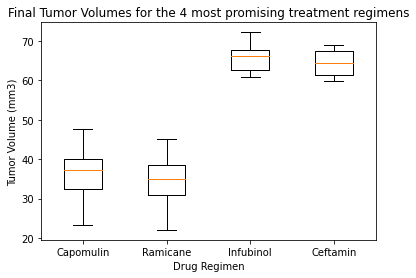

In [7]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels=['Capomulin','Ramicane','Infubinol','Ceftamin']
plt.boxplot([capomulin_final_tumorVolumes,ramicane_final_tumorVolumes,infubinol_final_tumorVolumes,ceftamin_final_tumorVolumes],
           labels=labels)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Final Tumor Volumes for the 4 most promising treatment regimens')

## Line and scatter plots

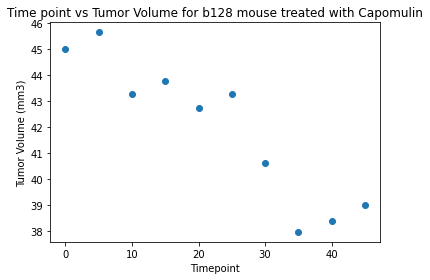

In [8]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_groupby_drug_mouseid = mouse_totaldata.groupby(['Drug Regimen','Mouse ID'])
mouse_128_capomulin_data = mouse_groupby_drug_mouseid.get_group(('Capomulin','b128'))
plt.scatter(mouse_128_capomulin_data['Timepoint'],mouse_128_capomulin_data['Tumor Volume (mm3)'])
plt.title('Time point vs Tumor Volume for b128 mouse treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

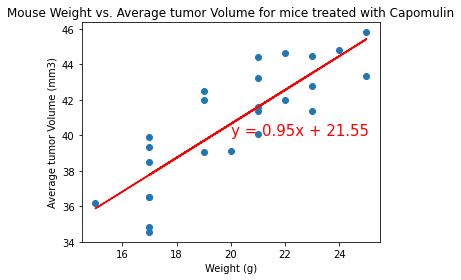

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_capomulin_data = mouse_totaldata.groupby('Drug Regimen').get_group('Capomulin')
mouse_capomulin_data_grouped = mouse_capomulin_data.groupby('Mouse ID')
x_axis = mouse_capomulin_data_grouped['Weight (g)'].mean()
y_axis = mouse_capomulin_data_grouped['Tumor Volume (mm3)'].mean()
plt.scatter(x_axis,y_axis)
plt.title('Mouse Weight vs. Average tumor Volume for mice treated with Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor Volume (mm3)')
plt.tight_layout()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.show()

In [10]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
print(f'The Correlation Coefficient for Mouse Weight and Tumor Volume for mice treated with Capomulin is {round(correlation[0],2)}. This means there is a strong correlation between the two variables.')

The Correlation Coefficient for Mouse Weight and Tumor Volume for mice treated with Capomulin is 0.84. This means there is a strong correlation between the two variables.
